In [3]:
# pandas, Numpy
import pandas as pd
import numpy as np

# Import visualization packages "Matplotlib" and "Seaborn". 
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import itertools

from ipywidgets import interact, widgets

In [4]:
#Read dataset and make a copy of the original
df_orig=pd.read_csv("supermarket_sales.csv", na_values='?')
df=df_orig.copy()

In [5]:
# Dataset Preview
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [6]:
#Dataset features and row count
df.shape

(1000, 17)

In [7]:
# Data types and other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<span style='color:green'> Column 10 Date datatype has to be changed to DateTime</span>

In [8]:
# change Date column to datetime data type
# Also, we can add month and day to see some trends.
df['Date'] = pd.to_datetime(df['Date'], format= 'mixed')
df['Month']=df['Date'].dt.month  # Only Jan, Feb and Mar months available.
df['Day']=df['Date'].dt.day_name()

In [9]:
# checking data type for date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
# checking 'month' and 'day' column that were added
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,Tuesday
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,Saturday
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2,Saturday
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2,Friday


In [11]:
def timeofday(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [12]:
# This variable can help to analyze rush hours for the store.
df['TimeoftheDay'] = pd.to_datetime(df['Time']).dt.hour.apply(timeofday)

In [13]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,TimeoftheDay
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,Tuesday,Afternoon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,Saturday,Evening
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2,Saturday,Afternoon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2,Friday,Afternoon


In [14]:
# checking missing values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Month                      0
Day                        0
TimeoftheDay               0
dtype: int64

In [15]:
# checking duplicates
df.duplicated().sum()

0

In [16]:
# Display Unique values for the categorical variables
for col in df.columns:
    if (df[col].dtype == 'object') & (df[col].nunique() <=15): # Limit to 15 varibles with categories
        print('column name: ' + col)
        print('num of unique values: ' + str(df[col].nunique()))
        print(df[col].unique())
        print("-" * 75)

column name: Branch
num of unique values: 3
['A' 'C' 'B']
---------------------------------------------------------------------------
column name: City
num of unique values: 3
['Yangon' 'Naypyitaw' 'Mandalay']
---------------------------------------------------------------------------
column name: Customer type
num of unique values: 2
['Member' 'Normal']
---------------------------------------------------------------------------
column name: Gender
num of unique values: 2
['Female' 'Male']
---------------------------------------------------------------------------
column name: Product line
num of unique values: 6
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
---------------------------------------------------------------------------
column name: Payment
num of unique values: 3
['Ewallet' 'Cash' 'Credit card']
---------------------------------------------------------------------------
column name: Day


# Data Visualization

##   Univariate Analysis

###  Categorical Variables

In [17]:
# get all categorical variables in categorical
df1=df
df1.drop(['Invoice ID', 'Time'], axis=1, inplace=True) # variables with too many categories
categorical = df1.select_dtypes(include = 'object').columns

 
categorical

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'Day', 'TimeoftheDay'],
      dtype='object')

In [18]:


palette = sns.color_palette('Accent', 8)

# Iterate over categorical columns to plot
def plot_chart(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    # Pie chart
    counts = df[col].value_counts()
    wedges, texts, autotexts = ax[0].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 18, 'fontfamily': 'serif'},
        shadow=False,
        wedgeprops={'edgecolor': 'black', 'lw': 1.5},
        colors=palette
    )
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
        autotext.set_size(14)
    
    ax[0].set_title(f'{col} - Pie Chart', fontweight='bold', fontfamily='serif')          

    # Count plot
    sns.countplot(x=col, data=df, ax=ax[1], palette=palette, edgecolor='black', lw=1.5, order=counts.index)
    ax[1].set_title(f'{col} - Count Plot', fontweight='bold', fontfamily='serif')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontfamily='serif', fontsize=12,rotation=45)
    
    # Annotate count plot
    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=14, fontweight='bold')
    plt.savefig(f'img/Categorical/{col}.png')
    plt.tight_layout()
    plt.show()
    
# Use interact to create an interactive widget
interact(plot_chart, col=widgets.Dropdown(options=categorical, description='Category:'))

interactive(children=(Dropdown(description='Category:', options=('Branch', 'City', 'Customer type', 'Gender', …

<function __main__.plot_chart(col)>

### Continuous Variables

In [19]:
df1=df
df1.drop(['Month'], axis=1, inplace=True)#it is not a numerical.
numerical = df1.select_dtypes(include = 'number').columns


numerical


Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [20]:
# Plotting settings
palette = sns.color_palette('Blues', 8)

In [21]:
def plot_distribution(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Distribution of Continuous Variables", fontsize=16, fontweight='bold')

    # Histogram
    counts, bins, patches = ax1.hist(df[column].dropna(), bins=20, edgecolor='black')
    ax1.set_xlabel(column, fontsize=14)
    ax1.set_ylabel("Counts", fontsize=14)

    # Adding data labels to histogram bars
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        ax1.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    # Boxplot
    ax2.boxplot(df[column].dropna(), vert=False)
    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel("", fontsize=14)

    # Adding median and quartile values to the box plot
    median = np.median(df[column].dropna())
    q1 = np.percentile(df[column].dropna(), 25)
    q3 = np.percentile(df[column].dropna(), 75)

    ax2.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(0, -28), 
                 textcoords='offset points', ha='center', va='center', color='red', fontsize=12)
    ax2.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='blue', fontsize=12)
    ax2.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='green', fontsize=12)

    plt.savefig(f'img/Numerical/{column}.png')
    plt.tight_layout()
    plt.show()

# Create an interactive widget
interact(plot_distribution, column=widgets.Dropdown(options=numerical, description='Numeric:'))

interactive(children=(Dropdown(description='Numeric:', options=('Unit price', 'Quantity', 'Tax 5%', 'Total', '…

<function __main__.plot_distribution(column)>

## Bivariate and Multivariate analysis

### Continuous Features vs. Continuous Features

In [22]:
df_corr= df1.select_dtypes(include=[np.number])

In [23]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unit price               1000 non-null   float64
 1   Quantity                 1000 non-null   int64  
 2   Tax 5%                   1000 non-null   float64
 3   Total                    1000 non-null   float64
 4   cogs                     1000 non-null   float64
 5   gross margin percentage  1000 non-null   float64
 6   gross income             1000 non-null   float64
 7   Rating                   1000 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


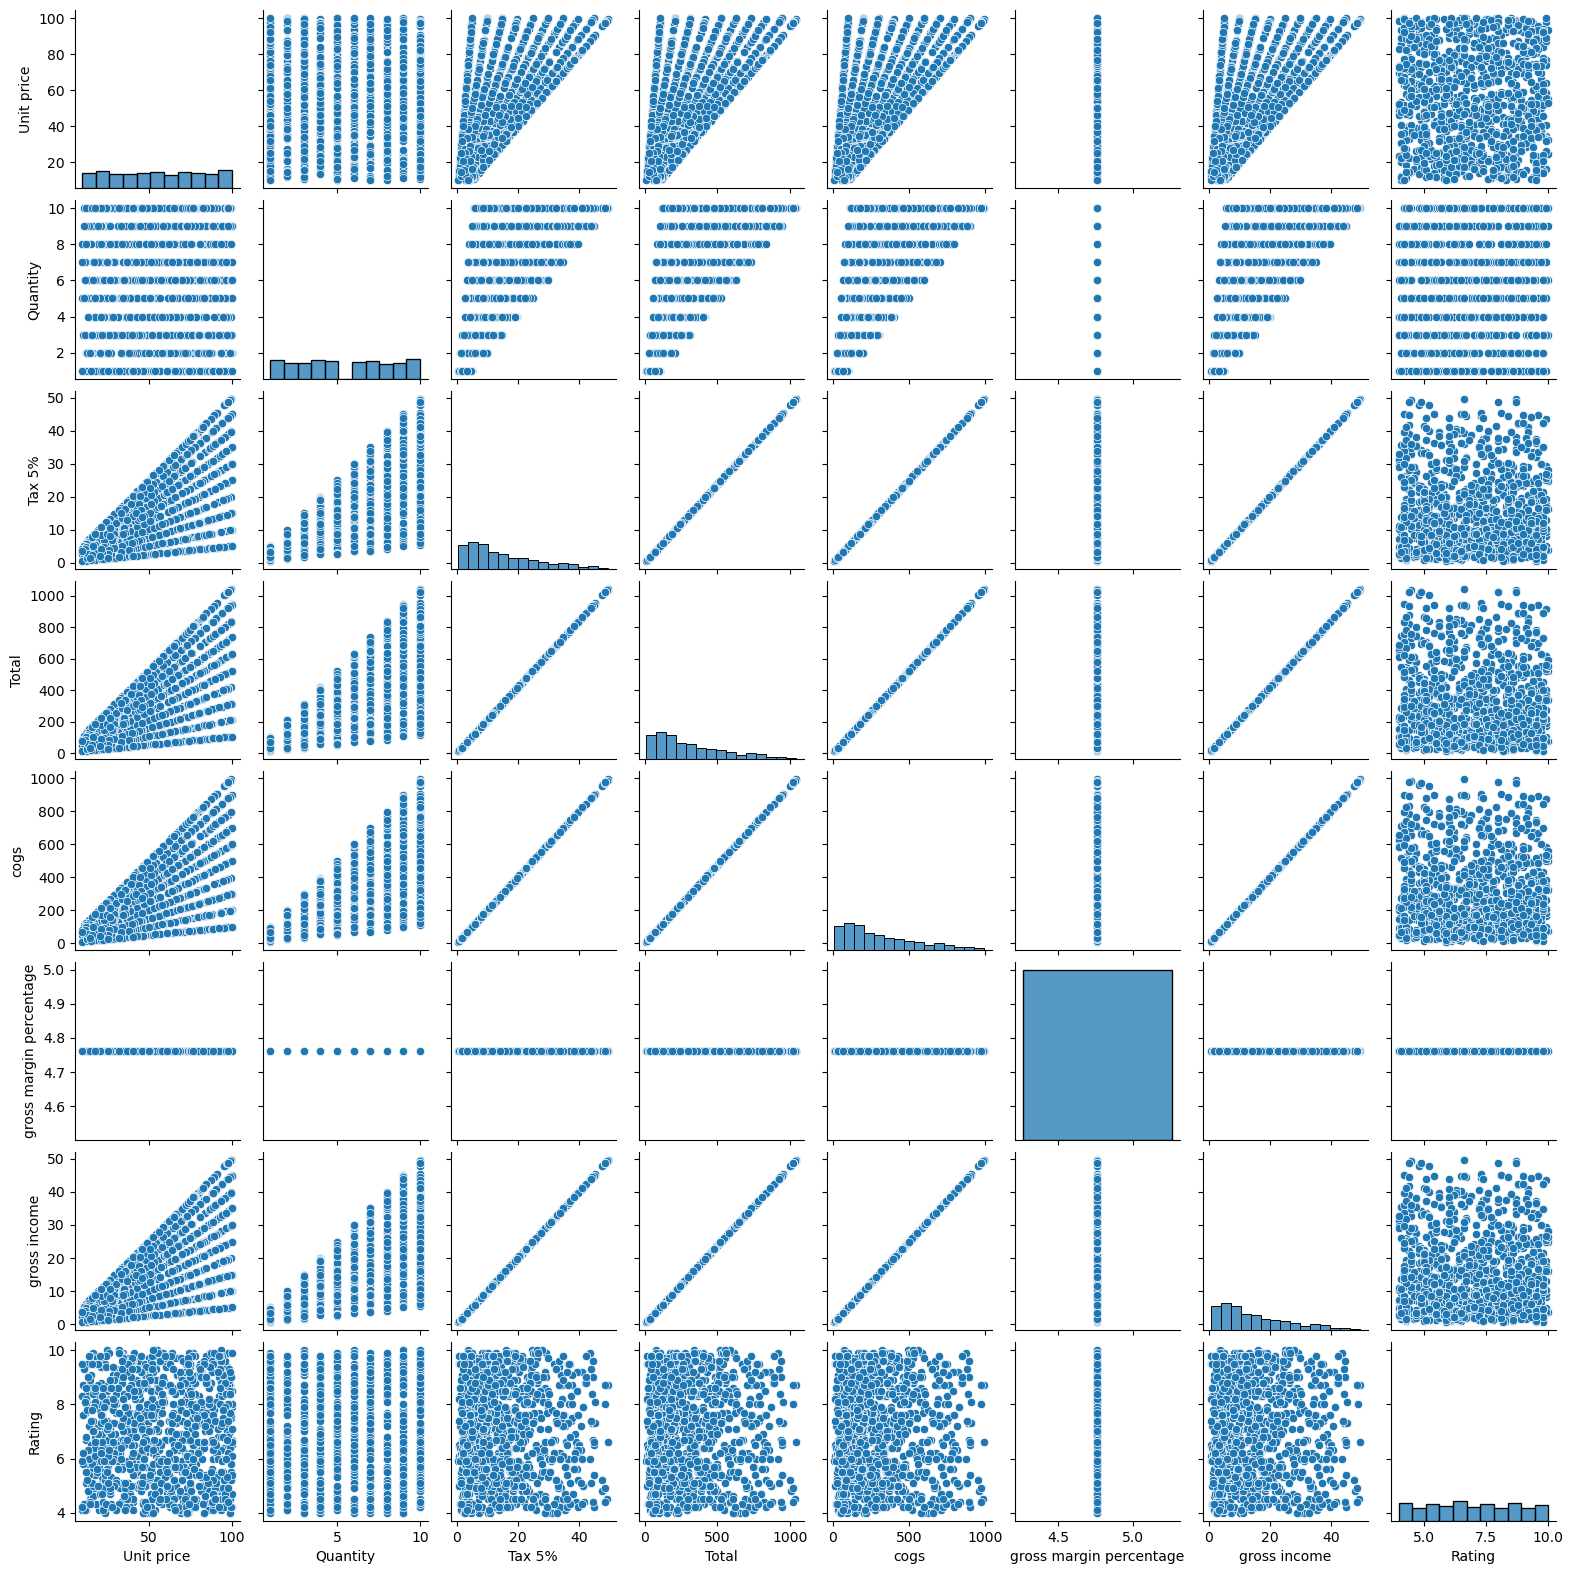

In [24]:
sns.pairplot(df_corr, height=2.0)

In [25]:
# drop constant feature
df_corr=df_corr.drop(columns='gross margin percentage') #  constant variable as shown in pairplots above
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unit price    1000 non-null   float64
 1   Quantity      1000 non-null   int64  
 2   Tax 5%        1000 non-null   float64
 3   Total         1000 non-null   float64
 4   cogs          1000 non-null   float64
 5   gross income  1000 non-null   float64
 6   Rating        1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


<Axes: >

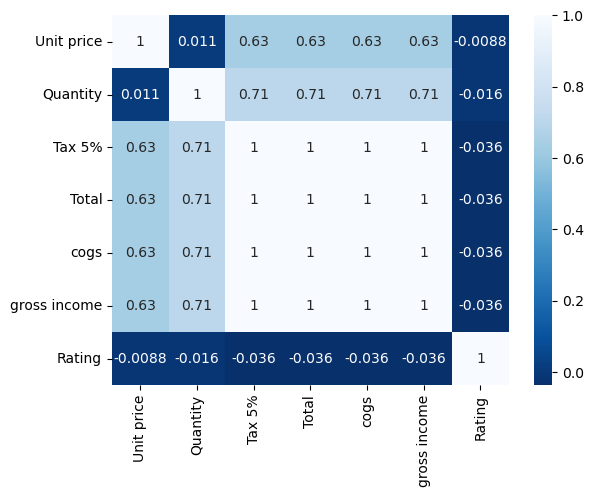

In [26]:
# Correlation matrix / heatmap
sns.heatmap(df_corr.corr(),cmap='Blues_r', annot=True)

### Categorical Features vs. Categorical Features

In [27]:
categorical_columns=[]
categorical_columns= df1.select_dtypes(include = 'object').columns
categorical_columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'Day', 'TimeoftheDay'],
      dtype='object')

In [28]:
palette = sns.color_palette('Accent', 12)
# Function to plot combinations
def plot_categorical_combinations(col1, col2):
    if col1 == col2:
        print("Please select two different columns.")
        return
    
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # Create count plot
    plot = sns.countplot(data=df, x=col1, hue=col2, ax=ax)
    ax.set_title(f'{col1} vs {col2}', fontsize=14, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    ax.legend(title=col2, bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
    
    # Add count labels
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='baseline', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')
        
        
    plt.savefig(f'img/CategoricalVsCategorical/{col1}vs{col2}.png')
    plt.tight_layout()
    plt.show()

# Create interactive widget
interact(
    plot_categorical_combinations,
    col1=widgets.Dropdown(options=categorical_columns, description='Category 1:'),
    col2=widgets.Dropdown(options=categorical_columns, description='Category 2:')
)


interactive(children=(Dropdown(description='Category 1:', options=('Branch', 'City', 'Customer type', 'Gender'…

<function __main__.plot_categorical_combinations(col1, col2)>

## Multivariate analysis

### Categorical vs Numerical

In [29]:
#Gross income by Gender and Product line
# List of product lines
product_lines = df['Product line'].unique().tolist()

sns.set_palette('Accent')
sns.set_style("darkgrid")

def plot_gross_income(product_line):
    fig, ax = plt.subplots(figsize=(20, 6))
    df1 = df[df["Product line"] == product_line]
    df_pivot1 = pd.pivot_table(
        df1, 
        values="gross income", 
        index="Product line",
        columns=["Gender"],
        aggfunc=np.sum
    )
    
    pivot = df_pivot1
    
    # Plot bar chart
    pivot.plot.bar(ax=ax, stacked=False, width=0.2)  # Adjust bar width here)
    ax.set_ylabel("Gross Income", fontsize=14)  # Set y-axis label font size
    ax.set_title(f"Gross income for {product_line} by Gender", fontsize=23)  # Set title font size
    
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=19, rotation=0)
    
    # Increase legend font size
    legend = ax.legend(title='Gender', fontsize=16, title_fontsize=18)  # Adjust legend and title font size

    # Adding count labels with specific font size
    for container in ax.containers:
        labels = [f'{int(v):,}' for v in container.datavalues]  # Format labels with commas
        ax.bar_label(container, labels=labels, label_type='center', fontsize=16)
    
    plt.savefig(f'img/ProductLineGrossIncomeGender/{product_line}.png')
    plt.tight_layout()
    plt.show()

# Create interactive widget
interact(
    plot_gross_income,
    product_line=widgets.Dropdown(options=product_lines, description='Product Line:')
)



interactive(children=(Dropdown(description='Product Line:', options=('Health and beauty', 'Electronic accessor…

<function __main__.plot_gross_income(product_line)>

In [30]:
sns.set_palette('Blues')
%matplotlib notebook

# Create a pivot table
pivot = pd.pivot_table(df, values='gross income', index='Gender', columns=['Product line'], aggfunc=np.sum, margins=True, margins_name='Total')


# Apply styling
styled_pivot = pivot.style \
                    .format("{:,.2f}") \
                    .background_gradient(cmap='Blues', axis=1) \
                   
                    

# Display the styled pivot table
display(styled_pivot)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Total
Gender,,,,,,,
Female,"1,290.57","1,449.40","1,579.57",883.86,"1,430.33","1,360.70","7,994.43"
Male,"1,296.93","1,136.60","1,094.00","1,458.70","1,134.53","1,264.20","7,384.94"
Total,"2,587.50","2,585.99","2,673.56","2,342.56","2,564.85","2,624.90","15,379.37"


In [31]:
# List of cities
cities = df['City'].unique().tolist()

sns.set_palette('Accent')
sns.set_style("darkgrid")

def plot_gross_income_by_time_and_day(city):
    df1 = df[df["City"] == city]
    
    df_pivot1 = pd.pivot_table(
        df1, 
        values="gross income", 
        index="Day",
        columns=["TimeoftheDay"],
        aggfunc=np.sum,
        fill_value=0
    )
    
    # Convert values to percentages
    df_pivot1_percentage = df_pivot1.div(df_pivot1.sum(axis=1), axis=0) * 100
    
    fig, ax = plt.subplots(figsize=(20, 6))
    
    # Plot horizontal bar chart
    pivot = df_pivot1_percentage
    pivot.plot(kind='barh', stacked=True, width=0.7, ax=ax, cmap='Accent')
    
    ax.set_ylabel("Day", fontsize=16)
    ax.set_xlabel("Gross income %", fontsize=16)
    ax.set_title(f"Gross income by time and day for {city}", fontsize=23)
    
    # Adjust axis labels
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=19, rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=19, rotation=0)
    
    # Adjust legend
    legend = ax.legend(title='Time', fontsize=16, title_fontsize=18, loc='upper right')
    
    # Adding percentage labels
    for container in ax.containers:
        labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=16, color='white')
   
    plt.savefig(f'img/CityDayTime/{city}.png')
    plt.tight_layout()
    plt.show()

# Create interactive widget
interact(
    plot_gross_income_by_time_and_day,
    city=widgets.Dropdown(options=cities, description='City:')
)

interactive(children=(Dropdown(description='City:', options=('Yangon', 'Naypyitaw', 'Mandalay'), value='Yangon…

<function __main__.plot_gross_income_by_time_and_day(city)>

In [32]:
sns.set_palette('Blues')
# Create a pivot table with totals
pivot = pd.pivot_table(
    df, 
    values='gross income', 
    index=['Day'], 
    columns=['TimeoftheDay'], 
    aggfunc=np.sum, 
    margins=True, 
    margins_name='Total',
    fill_value=0
)

# Calculate percentages for each time slot relative to the total for each day
pivot_percentage = pivot.div(pivot['Total'], axis=0) * 100

# Drop the 'Total' row after calculating percentages
pivot_percentage.drop('Total', inplace=True)
pivot_percentage.drop('Total', axis='columns',inplace=True)

styled_pivot_percentage = pivot_percentage.style \
    .format("{:.2f}%") \
    .background_gradient(cmap='Blues', axis=1)     
   

# Display the styled pivot table
display(styled_pivot_percentage)

TimeoftheDay,Afternoon,Evening,Morning
Day,,,
Friday,47.67%,33.39%,18.94%
Monday,53.62%,28.94%,17.44%
Saturday,41.39%,42.96%,15.65%
Sunday,43.83%,36.36%,19.80%
Thursday,42.50%,32.61%,24.89%
Tuesday,45.66%,35.29%,19.05%
Wednesday,48.64%,32.65%,18.71%


In [33]:
#Gross Income by day of the week and time

sns.set_palette('Blues')
%matplotlib notebook

# Create a pivot table
pivot = pd.pivot_table(df, values='gross income', index=['Day' ], columns=['TimeoftheDay'], aggfunc=np.sum, margins=True, margins_name='Total')


# Apply styling
styled_pivot = pivot.style \
                    .format("{:,.2f}") \
                    .background_gradient(cmap='Blues', axis=1)\
                        
    

# Display the styled pivot table
display(styled_pivot)

TimeoftheDay,Afternoon,Evening,Morning,Total
Day,,,,
Friday,997.06,698.43,396.24,"2,091.73"
Monday,967.69,522.22,314.81,"1,804.72"
Saturday,"1,106.04","1,148.14",418.23,"2,672.42"
Sunday,927.95,769.85,419.24,"2,117.04"
Thursday,917.74,704.21,537.53,"2,159.49"
Tuesday,"1,119.35",865.07,467.11,"2,451.54"
Wednesday,"1,012.89",679.91,389.63,"2,082.43"
Total,"7,048.73","5,387.84","2,942.80","15,379.37"


In [ ]:

from ydata_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df1,title="SuperStore Sales EDA Report")

# Save the report to .html
profile.to_file("Exploratory Data Analysis.html")